In [18]:
from pathlib import Path
from collections import Counter
from datetime import date
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np
import tqdm.notebook
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = Path.cwd().parent.joinpath('data', 'raw')

In [3]:
book_ratios = pd.read_table(DATA_PATH.joinpath('prices_assets_liabilities_quarterly.txt'), parse_dates=['datadate'])
book_ratios['book_value'] = (book_ratios.atq - book_ratios.ltq) * 1_000_000

shares = pd.read_table(DATA_PATH.joinpath('prices_shares_outstanding_daily.txt'), usecols=['datadate', 'tic', 'cshoc'],
                       parse_dates=['datadate'])
book_ratios = book_ratios.merge(shares, on=['datadate', 'tic'], how='left')

In [4]:
book_ratios.head()

,GVKEY,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,ltq,exchg,cik,costat,fic,prccq,prchq,prclq,book_value,cshoc
0,1213,2000-03-31,2000,1,12,INDL,C,D,STD,ABF,...,850.536,11,3000.0,I,USA,24.0000,26.875,17.0625,894.267,48763000.0
1,1213,2000-06-30,2000,2,12,INDL,C,D,STD,ABF,...,902.852,11,3000.0,I,USA,18.9375,24.250,18.0625,884.944,49014000.0
2,1213,2000-09-30,2000,3,12,INDL,C,D,STD,ABF,...,953.774,11,3000.0,I,USA,10.1875,19.750,9.5000,877.834,NaN
3,1213,2000-12-31,2000,4,12,INDL,C,D,STD,ABF,...,883.064,11,3000.0,I,USA,9.7500,11.000,8.2500,862.855,NaN
4,1213,2001-03-31,2001,1,12,INDL,C,D,STD,ABF,...,831.398,11,3000.0,I,USA,10.1700,13.750,9.2300,844.476,NaN


In [57]:
def fix_missing_shares(df):
    for ticker in tqdm.notebook.tqdm(df.tic.unique(), desc='tickers'):
        subset = shares[shares.tic == ticker].dropna()
        for row in tqdm.notebook.tqdm(df[df.tic == ticker].itertuples(), desc=ticker, leave=False):
            if np.isnan(row.cshoc):
                val = np.nan
                dt = row.datadate
                if row.datadate.year == 2000 and row.datadate.month == 3:
                    while np.isnan(val):
                        dt = dt + relativedelta(days=1)
                        if dt > date(2021, 4, 1):
                            val = subset[subset.datadate == subset.datadate.max()].cshoc.values[0]
                        else:
                            vals_array = subset[subset.datadate == dt].cshoc.values
                            val = vals_array[0] if len(vals_array) else np.nan
                else:
                    while np.isnan(val):
                        dt = dt - relativedelta(days=1)
                        if dt < date(2000, 1, 1):
                            val = subset[subset.datadate == subset.datadate.min()].cshoc.values[0]
                        else:
                            vals_array = subset[subset.datadate == dt].cshoc.values
                            val = vals_array[0] if len(vals_array) else np.nan
                df.loc[row.Index, 'cshoc'] = val
    return df

In [58]:
book_ratios = fix_missing_shares(book_ratios)

tickers:   0%|          | 0/357 [00:00<?, ?it/s]

ABF: 0it [00:00, ?it/s]

ALCO: 0it [00:00, ?it/s]

ANDE: 0it [00:00, ?it/s]

ADM: 0it [00:00, ?it/s]

ARDNA: 0it [00:00, ?it/s]

AVP: 0it [00:00, ?it/s]

BTI: 0it [00:00, ?it/s]

BDK: 0it [00:00, ?it/s]

HRB: 0it [00:00, ?it/s]

BOBE: 0it [00:00, ?it/s]

BC: 0it [00:00, ?it/s]

CDSCY: 0it [00:00, ?it/s]

CPB: 0it [00:00, ?it/s]

STZ: 0it [00:00, ?it/s]

CASY: 0it [00:00, ?it/s]

DOLE: 0it [00:00, ?it/s]

CHTT: 0it [00:00, ?it/s]

CHE: 0it [00:00, ?it/s]

CHD: 0it [00:00, ?it/s]

CTAS: 0it [00:00, ?it/s]

CLX: 0it [00:00, ?it/s]

COKE: 0it [00:00, ?it/s]

KO: 0it [00:00, ?it/s]

CL: 0it [00:00, ?it/s]

CAG: 0it [00:00, ?it/s]

CTB: 0it [00:00, ?it/s]

TAP: 0it [00:00, ?it/s]

DAN: 0it [00:00, ?it/s]

DG: 0it [00:00, ?it/s]

DRYR: 0it [00:00, ?it/s]

FARM: 0it [00:00, ?it/s]

FLO: 0it [00:00, ?it/s]

F: 0it [00:00, ?it/s]

GIS: 0it [00:00, ?it/s]

GM: 0it [00:00, ?it/s]

GNTX: 0it [00:00, ?it/s]

GPC: 0it [00:00, ?it/s]

GT: 0it [00:00, ?it/s]

HAS: 0it [00:00, ?it/s]

KHC: 0it [00:00, ?it/s]

HELE: 0it [00:00, ?it/s]

HSY: 0it [00:00, ?it/s]

HNI: 0it [00:00, ?it/s]

HRL: 0it [00:00, ?it/s]

HOV: 0it [00:00, ?it/s]

PAS: 0it [00:00, ?it/s]

JNJ: 0it [00:00, ?it/s]

JCI: 0it [00:00, ?it/s]

KTII: 0it [00:00, ?it/s]

K: 0it [00:00, ?it/s]

KWD: 0it [00:00, ?it/s]

KMB: 0it [00:00, ?it/s]

KR: 0it [00:00, ?it/s]

LZB: 0it [00:00, ?it/s]

LANC: 0it [00:00, ?it/s]

LNCE: 0it [00:00, ?it/s]

LEG: 0it [00:00, ?it/s]

LEN: 0it [00:00, ?it/s]

JEF: 0it [00:00, ?it/s]

KATE: 0it [00:00, ?it/s]

L: 0it [00:00, ?it/s]

LDG: 0it [00:00, ?it/s]

MDC: 0it [00:00, ?it/s]

MAT: 0it [00:00, ?it/s]

MKC: 0it [00:00, ?it/s]

MCK: 0it [00:00, ?it/s]

CVS: 0it [00:00, ?it/s]

MLHR: 0it [00:00, ?it/s]

MOD: 0it [00:00, ?it/s]

NAFC: 0it [00:00, ?it/s]

NATR: 0it [00:00, ?it/s]

NWL: 0it [00:00, ?it/s]

NKE: 0it [00:00, ?it/s]

PNR: 0it [00:00, ?it/s]

PEP: 0it [00:00, ?it/s]

MO: 0it [00:00, ?it/s]

PVH: 0it [00:00, ?it/s]

SENEA: 0it [00:00, ?it/s]

PG: 0it [00:00, ?it/s]

PHM: 0it [00:00, ?it/s]

RGS: 0it [00:00, ?it/s]

RAD: 0it [00:00, ?it/s]

HTSI: 0it [00:00, ?it/s]

RYL: 0it [00:00, ?it/s]

SWY: 0it [00:00, ?it/s]

HSH: 0it [00:00, ?it/s]

SEB: 0it [00:00, ?it/s]

SJM: 0it [00:00, ?it/s]

SNA: 0it [00:00, ?it/s]

CAA: 0it [00:00, ?it/s]

SWK: 0it [00:00, ?it/s]

SRR: 0it [00:00, ?it/s]

SVU: 0it [00:00, ?it/s]

SUP: 0it [00:00, ?it/s]

SYY: 0it [00:00, ?it/s]

TEN: 0it [00:00, ?it/s]

THO: 0it [00:00, ?it/s]

TR: 0it [00:00, ?it/s]

TSN: 0it [00:00, ?it/s]

UL: 0it [00:00, ?it/s]

CQB: 0it [00:00, ?it/s]

SXT: 0it [00:00, ?it/s]

UVV: 0it [00:00, ?it/s]

VFC: 0it [00:00, ?it/s]

VLGEA: 0it [00:00, ?it/s]

WDFC: 0it [00:00, ?it/s]

WMT: 0it [00:00, ?it/s]

WBA: 0it [00:00, ?it/s]

WMK: 0it [00:00, ?it/s]

WHR: 0it [00:00, ?it/s]

WINN: 0it [00:00, ?it/s]

WGO: 0it [00:00, ?it/s]

WWW: 0it [00:00, ?it/s]

WWY: 0it [00:00, ?it/s]

WN: 0it [00:00, ?it/s]

SPB: 0it [00:00, ?it/s]

NGVC: 0it [00:00, ?it/s]

COTY: 0it [00:00, ?it/s]

HOG: 0it [00:00, ?it/s]

TOL: 0it [00:00, ?it/s]

NVR: 0it [00:00, ?it/s]

KBH: 0it [00:00, ?it/s]

CCEP: 0it [00:00, ?it/s]

STKL: 0it [00:00, ?it/s]

PPC: 0it [00:00, ?it/s]

HAR: 0it [00:00, ?it/s]

JJSF: 0it [00:00, ?it/s]

IMKTA: 0it [00:00, ?it/s]

AD: 0it [00:00, ?it/s]

SAFM: 0it [00:00, ?it/s]

CCL: 0it [00:00, ?it/s]

WWAV: 0it [00:00, ?it/s]

TBL: 0it [00:00, ?it/s]

MIDD: 0it [00:00, ?it/s]

VGR: 0it [00:00, ?it/s]

WRC: 0it [00:00, ?it/s]

HLF: 0it [00:00, ?it/s]

IPAR: 0it [00:00, ?it/s]

PII: 0it [00:00, ?it/s]

BID: 0it [00:00, ?it/s]

MTH: 0it [00:00, ?it/s]

MGPI: 0it [00:00, ?it/s]

WES: 0it [00:00, ?it/s]

LEVI: 0it [00:00, ?it/s]

LEA: 0it [00:00, ?it/s]

EA: 0it [00:00, ?it/s]

SFM: 0it [00:00, ?it/s]

CSG: 0it [00:00, ?it/s]

SC: 0it [00:00, ?it/s]

USFD: 0it [00:00, ?it/s]

ENZY: 0it [00:00, ?it/s]

FGL: 0it [00:00, ?it/s]

DEO: 0it [00:00, ?it/s]

GIII: 0it [00:00, ?it/s]

SFS: 0it [00:00, ?it/s]

SMG: 0it [00:00, ?it/s]

ICON: 0it [00:00, ?it/s]

PRMW: 0it [00:00, ?it/s]

GPRO: 0it [00:00, ?it/s]

DPLO: 0it [00:00, ?it/s]

NBEV: 0it [00:00, ?it/s]

FRPT: 0it [00:00, ?it/s]

CRON: 0it [00:00, ?it/s]

VSTO: 0it [00:00, ?it/s]

ENR: 0it [00:00, ?it/s]

BLD: 0it [00:00, ?it/s]

ETH: 0it [00:00, ?it/s]

SONC: 0it [00:00, ?it/s]

JNY: 0it [00:00, ?it/s]

PNRA: 0it [00:00, ?it/s]

MNST: 0it [00:00, ?it/s]

FIZZ: 0it [00:00, ?it/s]

STEI: 0it [00:00, ?it/s]

JBSS: 0it [00:00, ?it/s]

PRGO: 0it [00:00, ?it/s]

WFM: 0it [00:00, ?it/s]

IMT: 0it [00:00, ?it/s]

ELY: 0it [00:00, ?it/s]

BETR: 0it [00:00, ?it/s]

LFVN: 0it [00:00, ?it/s]

MHK: 0it [00:00, ?it/s]

DHI: 0it [00:00, ?it/s]

TWNK: 0it [00:00, ?it/s]

SBUX: 0it [00:00, ?it/s]

CENTA: 0it [00:00, ?it/s]

ACI: 0it [00:00, ?it/s]

CCU: 0it [00:00, ?it/s]

TOM: 0it [00:00, ?it/s]

RRR: 0it [00:00, ?it/s]

APFH: 0it [00:00, ?it/s]

ADNT: 0it [00:00, ?it/s]

SMPL: 0it [00:00, ?it/s]

NLS: 0it [00:00, ?it/s]

ELF: 0it [00:00, ?it/s]

JAH: 0it [00:00, ?it/s]

FOSL: 0it [00:00, ?it/s]

MOND: 0it [00:00, ?it/s]

BWA: 0it [00:00, ?it/s]

SPTN: 0it [00:00, ?it/s]

PFGC: 0it [00:00, ?it/s]

LW: 0it [00:00, ?it/s]

KOF: 0it [00:00, ?it/s]

KDP: 0it [00:00, ?it/s]

DECK: 0it [00:00, ?it/s]

COST: 0it [00:00, ?it/s]

MATK: 0it [00:00, ?it/s]

SHOO: 0it [00:00, ?it/s]

MED: 0it [00:00, ?it/s]

HAIN: 0it [00:00, ?it/s]

TSCO: 0it [00:00, ?it/s]

BZH: 0it [00:00, ?it/s]

RAH: 0it [00:00, ?it/s]

LMNR: 0it [00:00, ?it/s]

BTH: 0it [00:00, ?it/s]

KCP: 0it [00:00, ?it/s]

FDP: 0it [00:00, ?it/s]

DAR: 0it [00:00, ?it/s]

APOL: 0it [00:00, ?it/s]

NTRI: 0it [00:00, ?it/s]

PTRY: 0it [00:00, ?it/s]

RCII: 0it [00:00, ?it/s]

WOW: 0it [00:00, ?it/s]

MVL: 0it [00:00, ?it/s]

DLTR: 0it [00:00, ?it/s]

ABC: 0it [00:00, ?it/s]

DLPH: 0it [00:00, ?it/s]

ROKU: 0it [00:00, ?it/s]

VNE: 0it [00:00, ?it/s]

BJ: 0it [00:00, ?it/s]

HFFG: 0it [00:00, ?it/s]

UTZ: 0it [00:00, ?it/s]

BYND: 0it [00:00, ?it/s]

KTB: 0it [00:00, ?it/s]

CTVA: 0it [00:00, ?it/s]

CPAA: 0it [00:00, ?it/s]

PTON: 0it [00:00, ?it/s]

BRBR: 0it [00:00, ?it/s]

BEAM: 0it [00:00, ?it/s]

REYN: 0it [00:00, ?it/s]

PPD: 0it [00:00, ?it/s]

CARR: 0it [00:00, ?it/s]

VITL: 0it [00:00, ?it/s]

LSF: 0it [00:00, ?it/s]

AVO: 0it [00:00, ?it/s]

CD: 0it [00:00, ?it/s]

NHTC: 0it [00:00, ?it/s]

OO: 0it [00:00, ?it/s]

CSKI: 0it [00:00, ?it/s]

POOL: 0it [00:00, ?it/s]

EL: 0it [00:00, ?it/s]

SAM: 0it [00:00, ?it/s]

LTRE: 0it [00:00, ?it/s]

RDEN: 0it [00:00, ?it/s]

LNDC: 0it [00:00, ?it/s]

REV: 0it [00:00, ?it/s]

JAKK: 0it [00:00, ?it/s]

TUP: 0it [00:00, ?it/s]

OATS: 0it [00:00, ?it/s]

USNA: 0it [00:00, ?it/s]

UNFI: 0it [00:00, ?it/s]

NUS: 0it [00:00, ?it/s]

CALM: 0it [00:00, ?it/s]

TIVO: 0it [00:00, ?it/s]

TTWO: 0it [00:00, ?it/s]

ALV: 0it [00:00, ?it/s]

SHF: 0it [00:00, ?it/s]

AMZN: 0it [00:00, ?it/s]

RL: 0it [00:00, ?it/s]

PSMT: 0it [00:00, ?it/s]

AIPC: 0it [00:00, ?it/s]

INGR: 0it [00:00, ?it/s]

URI: 0it [00:00, ?it/s]

SCS: 0it [00:00, ?it/s]

TPB: 0it [00:00, ?it/s]

SAP: 0it [00:00, ?it/s]

COLM: 0it [00:00, ?it/s]

SVM: 0it [00:00, ?it/s]

JSDA: 0it [00:00, ?it/s]

OME: 0it [00:00, ?it/s]

MTEX: 0it [00:00, ?it/s]

EBAY: 0it [00:00, ?it/s]

AXL: 0it [00:00, ?it/s]

APTV: 0it [00:00, ?it/s]

PBG: 0it [00:00, ?it/s]

RAI: 0it [00:00, ?it/s]

SKX: 0it [00:00, ?it/s]

TWE: 0it [00:00, ?it/s]

STMP: 0it [00:00, ?it/s]

EXPE: 0it [00:00, ?it/s]

ADY: 0it [00:00, ?it/s]

EPC: 0it [00:00, ?it/s]

KKD: 0it [00:00, ?it/s]

VC: 0it [00:00, ?it/s]

LEXR: 0it [00:00, ?it/s]

TPR: 0it [00:00, ?it/s]

GRMN: 0it [00:00, ?it/s]

ETP: 0it [00:00, ?it/s]

SNMX: 0it [00:00, ?it/s]

MDLZ: 0it [00:00, ?it/s]

COL: 0it [00:00, ?it/s]

BG: 0it [00:00, ?it/s]

CPG: 0it [00:00, ?it/s]

LO: 0it [00:00, ?it/s]

WBD: 0it [00:00, ?it/s]

CVGW: 0it [00:00, ?it/s]

CRI: 0it [00:00, ?it/s]

LKQ: 0it [00:00, ?it/s]

TPX: 0it [00:00, ?it/s]

TRW: 0it [00:00, ?it/s]

BGS: 0it [00:00, ?it/s]

DPZ: 0it [00:00, ?it/s]

PBH: 0it [00:00, ?it/s]

HOGS: 0it [00:00, ?it/s]

DMND: 0it [00:00, ?it/s]

THS: 0it [00:00, ?it/s]

CHBT: 0it [00:00, ?it/s]

BDBD: 0it [00:00, ?it/s]

CROX: 0it [00:00, ?it/s]

UAA: 0it [00:00, ?it/s]

SEED: 0it [00:00, ?it/s]

SUSS: 0it [00:00, ?it/s]

POST: 0it [00:00, ?it/s]

BATS: 0it [00:00, ?it/s]

CELH: 0it [00:00, ?it/s]

HBI: 0it [00:00, ?it/s]

BARE: 0it [00:00, ?it/s]

FACE: 0it [00:00, ?it/s]

WBC: 0it [00:00, ?it/s]

G: 0it [00:00, ?it/s]

LULU: 0it [00:00, ?it/s]

CZZ: 0it [00:00, ?it/s]

SRV: 0it [00:00, ?it/s]

PM: 0it [00:00, ?it/s]

DPS: 0it [00:00, ?it/s]

ATVI: 0it [00:00, ?it/s]

DL: 0it [00:00, ?it/s]

MJN: 0it [00:00, ?it/s]

TFM: 0it [00:00, ?it/s]

TSLA: 0it [00:00, ?it/s]

PF: 0it [00:00, ?it/s]

SODA: 0it [00:00, ?it/s]

ARMK: 0it [00:00, ?it/s]

CHEF: 0it [00:00, ?it/s]

TEA: 0it [00:00, ?it/s]

ZNGA: 0it [00:00, ?it/s]

CG: 0it [00:00, ?it/s]

GO: 0it [00:00, ?it/s]

BNNY: 0it [00:00, ?it/s]

CPRI: 0it [00:00, ?it/s]

RNDY: 0it [00:00, ?it/s]

ABEV: 0it [00:00, ?it/s]

CRESY: 0it [00:00, ?it/s]

BRFS: 0it [00:00, ?it/s]

IBA: 0it [00:00, ?it/s]

BUD: 0it [00:00, ?it/s]

ESI: 0it [00:00, ?it/s]

NOMD: 0it [00:00, ?it/s]

In [76]:
book_ratios['bv_per_share'] = book_ratios.book_value / book_ratios.cshoc

In [77]:
book_ratios['ptb'] = book_ratios.prccq / book_ratios.bv_per_share

In [78]:
def get_bad_data(book_ratios):
    bad_data = list()
    for ticker in book_ratios.tic.unique():
        subset = book_ratios[book_ratios.tic == ticker]
        if np.isnan(subset.ptb.iloc[-1]):
            subset = subset.iloc[:-1]
        current = 'na' if np.isnan(subset.ptb.iloc[0]) else 'val'
        for v in subset.ptb[1:]:
            if not np.isnan(v):
                current = 'val'
            elif current == 'val' and np.isnan(v):
                name = subset.conm.values[0]
                bad_data.append((ticker, name))
                continue
    return Counter(bad_data)

In [79]:
bad_data_1 = get_bad_data(book_ratios)
bad_data_1

Counter({('BTI', 'BRITISH AMER TOBACCO PLC'): 39,
         ('CDSCY', 'CADBURY PLC'): 17,
         ('KHC', 'KRAFT HEINZ CO'): 1,
         ('LZB', 'LA-Z-BOY INC'): 1,
         ('JEF', 'JEFFERIES FINANCIAL GRP INC'): 1,
         ('NATR', 'NATURES SUNSHINE PRODS INC'): 1,
         ('PEP', 'PEPSICO INC'): 1,
         ('UL', 'UNILEVER PLC'): 54,
         ('CCEP', 'COCA-COLA EUROPEAN PARTNERS'): 4,
         ('STKL', 'SUNOPTA INC'): 2,
         ('DEO', 'DIAGEO PLC'): 41,
         ('ICON', 'ICONIX BRAND GROUP INC'): 1,
         ('CCU', 'COMPANIA CERVECERIAS UNIDAS'): 2,
         ('SMPL', 'SIMPLY GOOD FOODS COMPANY'): 2,
         ('KOF', 'COCA-COLA FEMSA SAB DE CV'): 2,
         ('BTH', 'BLYTH INC'): 1,
         ('RDEN', 'ELIZABETH ARDEN INC'): 3,
         ('TTWO', 'TAKE-TWO INTERACTIVE SFTWR'): 2,
         ('AIPC', 'AMER ITALIAN PASTA CO  -CL A'): 4,
         ('PBG', 'PEPSI BOTTLING GROUP INC'): 1,
         ('EXPE', 'EXPEDIA GROUP INC'): 2,
         ('SEED', 'ORIGIN AGRITECH LTD'): 8,
         

In [81]:
for elem in bad_data_1.items():
    if elem[1] == 1:
        subset = book_ratios[book_ratios.tic == elem[0][0]]
        ind = subset[subset.ptb.isna()].index[-1]
        if ind == subset.index[-1]:
            subset.loc[ind, 'ptb'] = subset.loc[ind - 1, 'ptb']
        else:
            subset.loc[ind, 'ptb'] = (subset.loc[ind - 1, 'ptb'] + subset.loc[ind + 1, 'ptb']) / 2
        book_ratios[book_ratios.tic == elem[0][0]] = subset

In [83]:
get_bad_data(book_ratios)

Counter({('BTI', 'BRITISH AMER TOBACCO PLC'): 39,
         ('CDSCY', 'CADBURY PLC'): 17,
         ('UL', 'UNILEVER PLC'): 54,
         ('CCEP', 'COCA-COLA EUROPEAN PARTNERS'): 4,
         ('STKL', 'SUNOPTA INC'): 2,
         ('DEO', 'DIAGEO PLC'): 41,
         ('ICON', 'ICONIX BRAND GROUP INC'): 1,
         ('CCU', 'COMPANIA CERVECERIAS UNIDAS'): 2,
         ('SMPL', 'SIMPLY GOOD FOODS COMPANY'): 2,
         ('KOF', 'COCA-COLA FEMSA SAB DE CV'): 2,
         ('RDEN', 'ELIZABETH ARDEN INC'): 3,
         ('TTWO', 'TAKE-TWO INTERACTIVE SFTWR'): 2,
         ('AIPC', 'AMER ITALIAN PASTA CO  -CL A'): 4,
         ('EXPE', 'EXPEDIA GROUP INC'): 2,
         ('SEED', 'ORIGIN AGRITECH LTD'): 8,
         ('CZZ', 'COSAN LTD'): 2,
         ('CRESY', 'CRESUD SACIFYA'): 5,
         ('BRFS', 'BRF SA'): 13,
         ('BUD', 'ANHEUSER-BUSCH INBEV'): 22})

In [89]:
last_ptb = list()
for tick in book_ratios.tic.unique():
    subset = book_ratios[book_ratios.tic == tick]
    val = subset.ptb.values[-1]
    if not np.isnan(val):
        if val < 4:
            last_ptb.append(subset.ptb.values[-1])

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   2.,   2.,   3.,   4.,   3.,  97., 124.]),
 array([-41.62925204, -39.34930234, -37.06935265, -34.78940295,
        -32.50945326, -30.22950357, -27.94955387, -25.66960418,
        -23.38965448, -21.10970479, -18.8297551 , -16.5498054 ,
        -14.26985571, -11.98990601,  -9.70995632,  -7.43000662,
         -5.15005693,  -2.87010724,  -0.59015754,   1.68979215,
          3.96974185]),
 <a list of 20 Patch objects>)

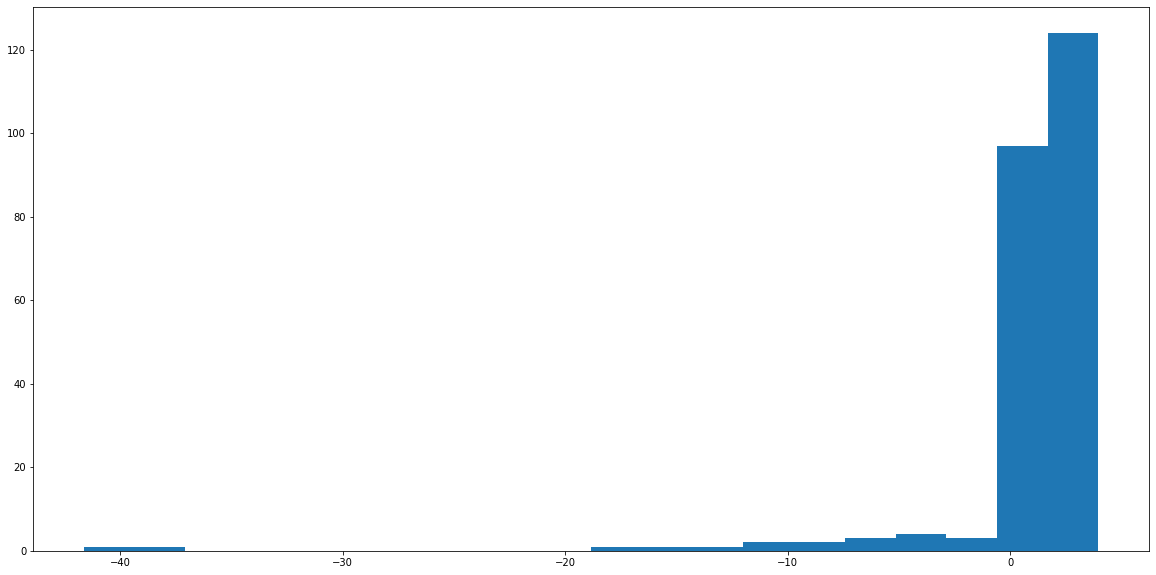

In [87]:
plt.figure(figsize=(20, 10))
plt.hist(last_ptb, bins=20)

In [91]:
returns = {'value': [], 'growth': []}
tickers = {'value': [], 'growth': []}
ptbs = {'value': [], 'growth': []}
for tick in tqdm.notebook.tqdm(book_ratios.tic.unique()):
    subset = book_ratios[book_ratios.tic == tick]
    subset['return'] = subset.prccq.pct_change()
    if subset.ptb.values[-1] > 1:
        returns['growth'].append(subset['return'].mean())
        tickers['growth'].append(tick)
        ptbs['growth'].append(subset.ptb.values[-1])
    else:
        returns['value'].append(subset['return'].mean())
        tickers['value'].append(tick)
        ptbs['value'].append(subset.ptb.values[-1])

  0%|          | 0/357 [00:00<?, ?it/s]

<ipython-input-91-c5ca1ac78ff2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['return'] = subset.prccq.pct_change()


In [92]:
npvalue = np.array(returns['value'])
npgrowth = np.array(returns['growth'])

In [93]:
np.nanmean(npvalue) - np.nanmean(npgrowth)

0.003682302518744865

In [95]:
ticks = []
ptb_values = []
rets = []
for i in range(len(tickers['value'])):
    ticks.append(tickers['value'][i])
    ptb_values.append(ptbs['value'][i])
    rets.append(returns['value'][i])

for i in range(len(tickers['growth'])):
    ticks.append(tickers['growth'][i])
    ptb_values.append(ptbs['growth'][i])
    rets.append(returns['growth'][i])

In [103]:
ticks = np.array(ticks)
ptb_values = np.array(ptb_values)
rets = np.array(rets)
rets = np.delete(rets, np.where(np.isnan(ptb_values))[0])
ticks = np.delete(ticks, np.where(np.isnan(ptb_values))[0])
ptb_values = np.delete(ptb_values, np.where(np.isnan(ptb_values))[0])

In [107]:
q = []
for i in range(0, 100, 20):
    mask = np.logical_and(ptb_values > np.percentile(ptb_values, i), ptb_values < np.percentile(ptb_values, i + 10))
    rr = rets[mask]
    q.append(np.nanmean(rr))

<BarContainer object of 5 artists>

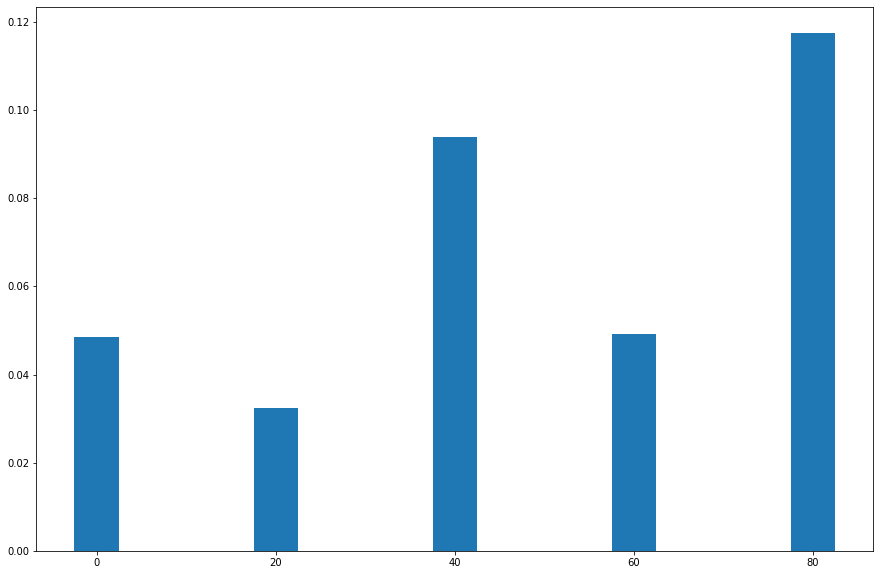

In [108]:
plt.figure(figsize=(15, 10))
plt.bar(x=range(0, 100, 20), height=q, width=5)